In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d umairshahpirzada/birds-20-species-image-classification

 94% 65.0M/69.3M [00:04<00:00, 9.83MB/s]
100% 69.3M/69.3M [00:04<00:00, 15.3MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/birds-20-species-image-classification.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,models
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor="val_loss",mode='min',verbose=1,patience=25)
from keras.applications.vgg16 import VGG16


In [ ]:
conv_base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
model=Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(20,activation='softmax'))

In [ ]:
conv_base.trainable= False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 20)                5140      
                                                                 
Total params: 16,817,236
Trainable params: 2,102,548
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
# Data Augmentation
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,zoom_range=0.2, horizontal_flip=True
)
test_datagen=ImageDataGenerator(
    rescale=1./255
)
valid_datagen=ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_generator=train_datagen.flow_from_directory(
    '/content/train',target_size=(150,150),batch_size=batch_size,class_mode='binary'
)

validation_generator=valid_datagen.flow_from_directory(
    '/content/train',target_size=(150,150),batch_size=batch_size,class_mode='binary'
)
test_generator=test_datagen.flow_from_directory(
    '/content/train',target_size=(150,150),batch_size=batch_size,class_mode='binary'
)

Found 3208 images belonging to 20 classes.
Found 3208 images belonging to 20 classes.
Found 3208 images belonging to 20 classes.


In [ ]:
import os

# Assuming you have a train directory containing subdirectories for each class
train_dir = '/content/train'

# Get the class names from the subdirectory names
class_names = sorted(os.listdir(train_dir))

# Print the class names
class_names

['ABBOTTS BABBLER',
 'ABBOTTS BOOBY',
 'ABYSSINIAN GROUND HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN EMERALD CUCKOO',
 'AFRICAN FIREFINCH',
 'AFRICAN OYSTER CATCHER',
 'AFRICAN PIED HORNBILL',
 'AFRICAN PYGMY GOOSE',
 'ALBATROSS',
 'ALBERTS TOWHEE',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'ALTAMIRA YELLOWTHROAT',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN FLAMINGO',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL']

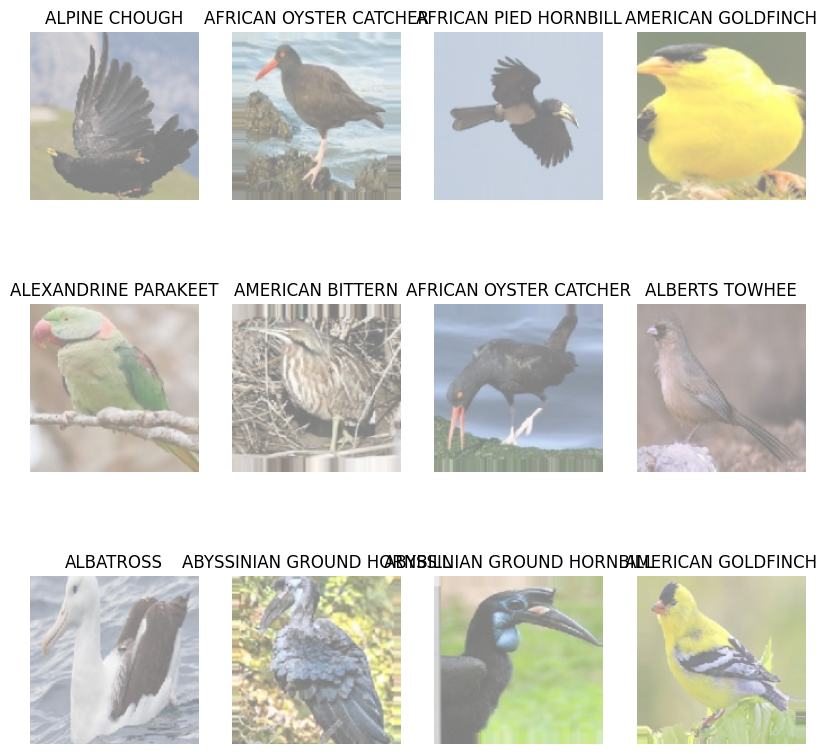

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already created and configured the train_generator and class_names.

# Get a batch of data from the train_generator
batch_images, batch_labels = next(train_generator)

# Undo normalization (if applied) to bring the images back to the original scale
denormalized_images = (batch_images + 1) * 127.5

# Convert from (-1, 1) to (0, 255) and cast to uint8
denormalized_images = denormalized_images.astype("uint8")

# Create a 3x4 grid of subplots
plt.figure(figsize=(10, 10))
for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(denormalized_images[i])
    plt.title(class_names[int(batch_labels[i])])
    plt.axis("off")

plt.show()

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
101/101 [==============================] - 48s 333ms/step - loss: 1.6101 - accuracy: 0.5346 - val_loss: 0.6230 - val_accuracy: 0.8223
Epoch 2/10
101/101 [==============================] - 30s 293ms/step - loss: 0.6567 - accuracy: 0.8105 - val_loss: 0.3967 - val_accuracy: 0.8897
Epoch 3/10
101/101 [==============================] - 34s 336ms/step - loss: 0.4398 - accuracy: 0.8688 - val_loss: 0.2601 - val_accuracy: 0.9274
Epoch 4/10
101/101 [==============================] - 29s 290ms/step - loss: 0.3085 - accuracy: 0.9108 - val_loss: 0.2806 - val_accuracy: 0.9239
Epoch 5/10
101/101 [==============================] - 33s 327ms/step - loss: 0.2658 - accuracy: 0.9211 - val_loss: 0.1575 - val_accuracy: 0.9557
Epoch 6/10
101/101 [==============================] - 29s 288ms/step - loss: 0.1833 - accuracy: 0.9454 - val_loss: 0.1018 - val_accuracy: 0.9741
Epoch 7/10
101/101 [==============================] - 30s 294ms/step - loss: 0.1501 - accuracy: 0.9582 - val_loss: 0.0906 - val_ac

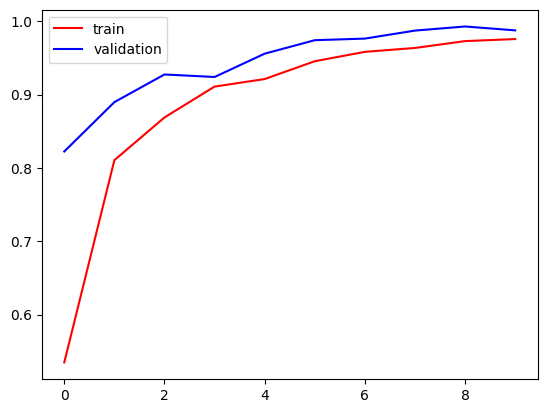

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

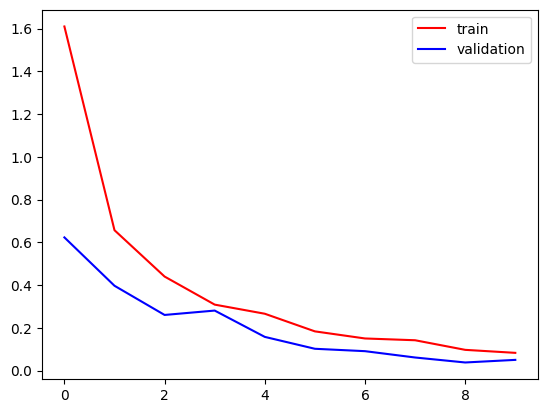

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
scores=model.evaluate(test_generator)

101/101 [==============================] - 7s 68ms/step - loss: 0.0499 - accuracy: 0.9875


In [ ]:
scores

[0.04989787936210632, 0.9875311851501465]

In [ ]:
batch = next(test_generator)
print("Image Batch Shape:", batch[0].shape)
print("Label Batch:", batch[1])

Image Batch Shape: (32, 150, 150, 3)
Label Batch: [ 3. 19. 19.  0.  2. 15.  5.  9.  1. 14.  8. 17.  6.  9.  2.  3.  9.  7.
 17.  2.  6.  8. 15.  0. 16. 16.  3.  2.  0.  8.  4. 12.]


1/1 [==============================] - 0s 20ms/step


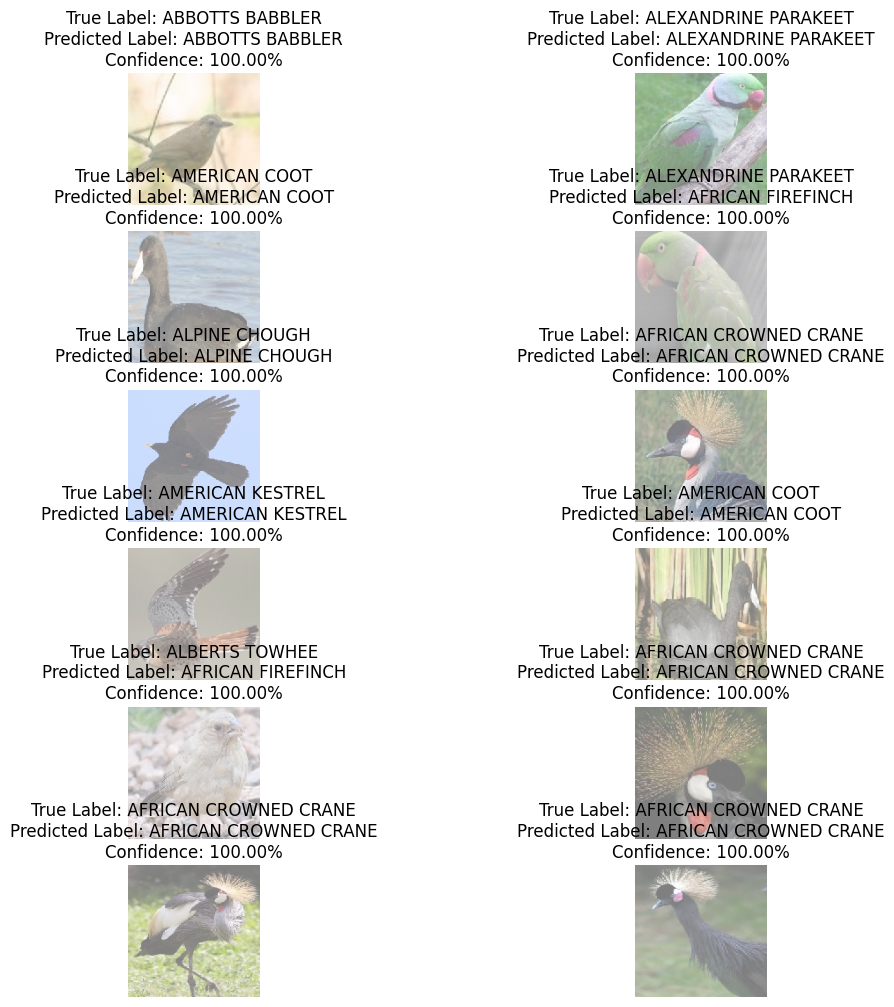

In [ ]:
import itertools

# Assuming you have already created and configured the test_generator and class_names.

# Create a loop that breaks after displaying 12 images
for batch_images, batch_labels in itertools.islice(test_generator, 1):
    # Undo normalization (if applied) to bring the images back to the original scale
    denormalized_images = (batch_images + 1) * 127.5
    denormalized_images = denormalized_images.astype("uint8")

    # Get predictions for the batch
    batch_predictions = model.predict(denormalized_images)

    # Create a 3x4 grid of subplots
    fig, axes = plt.subplots(6, 2, figsize=(12, 12))

    # Loop through the individual images in the batch
    for i, ax in enumerate(axes.flat):
        true_label = class_names[int(batch_labels[i])]
        predicted_label = class_names[np.argmax(batch_predictions[i])]
        confidence = np.max(batch_predictions[i]) * 100

        # Display the image along with the true and predicted labels and confidence
        ax.imshow(denormalized_images[i])
        ax.set_title(f"True Label: {true_label}\nPredicted Label: {predicted_label}\nConfidence: {confidence:.2f}%")
        ax.axis("off")

    plt.show()
    break  # Break after displaying 12 images


